In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
amazon_raw = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/sentiment/amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_raw.columns = ['review', 'sentiment']
amazon_raw.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [271]:
keywords = ['good', 'excellent', 'great', 'impressed', 'recommend', 'well', 'fine', 'best', 'beautiful', 'pretty', 'happy', 
            'like', 'love', 'satisfied', 'joy', 'nice', 'easy', 'perfect', 'glad', 'pleased','quick', 'exactly']

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.review.str.contains(str(key),case=False)

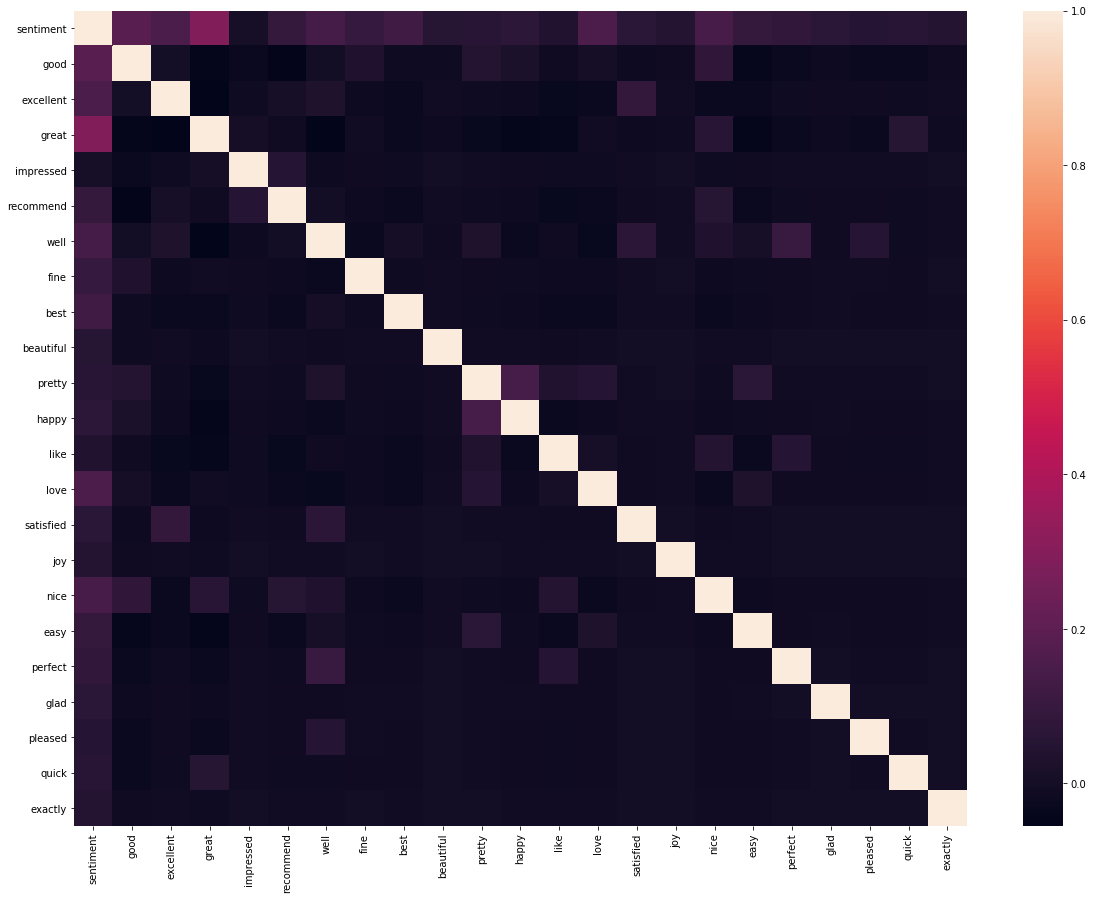

In [272]:
plt.figure(figsize = (20,15))
sns.heatmap(amazon_raw.corr())

In [273]:
data = amazon_raw[keywords]
target = amazon_raw['sentiment']

In [274]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 220


In [275]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(data, target).predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(      
          data.shape[0],(target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 364


In [276]:
yelp_raw = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/sentiment/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'sentiment']
yelp_raw.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [277]:
for key in keywords:
    yelp_raw[str(key)] = yelp_raw.review.str.contains(str(key),case=False)

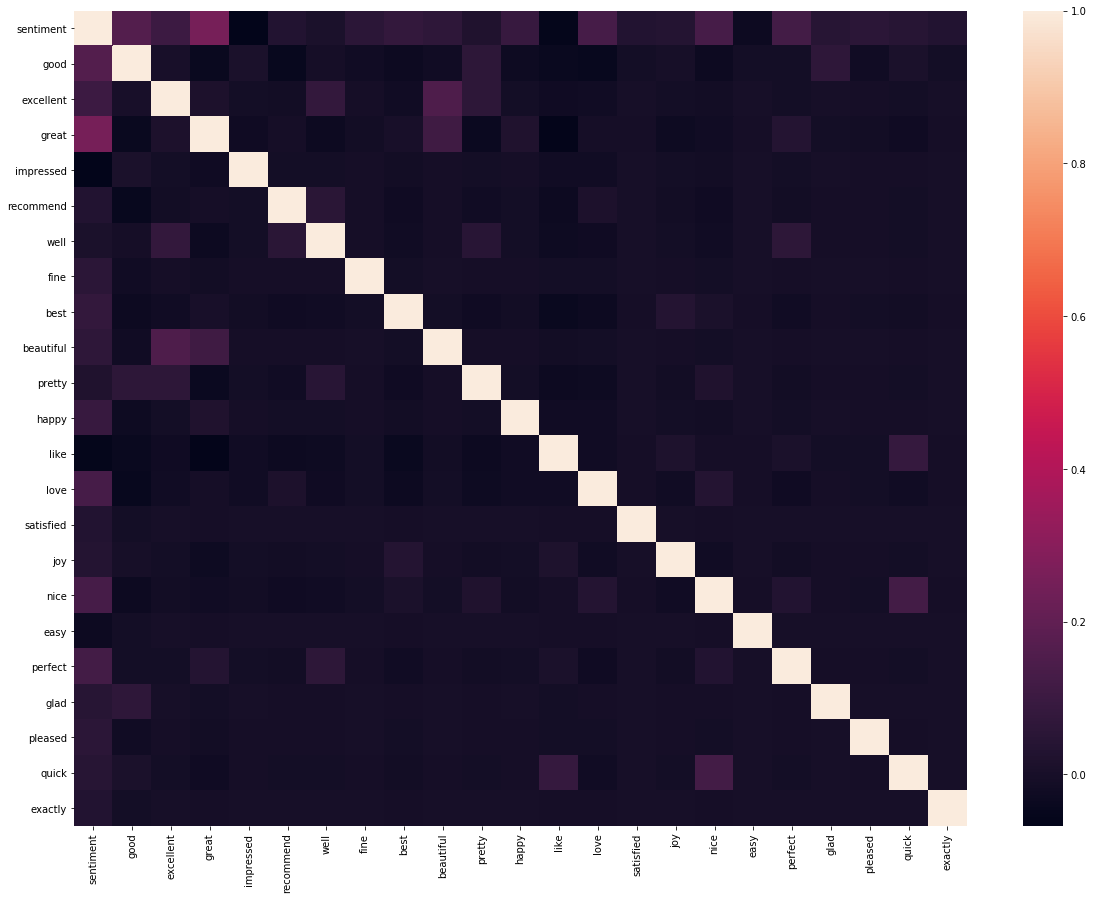

In [278]:
plt.figure(figsize = (20,15))
sns.heatmap(yelp_raw.corr())

In [279]:
data2 = yelp_raw[keywords]
target2 = yelp_raw['sentiment']

In [280]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data2, target2)
y_pred2 = bnb.predict(data2)
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0], (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 301


In [281]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred2 = gnb.fit(data2, target2).predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(      
          data2.shape[0],(target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 1000 points : 492


I tried to pick the most common word for positive sentiment in to pick the features for the model. The model acciracy for the training data was approx (78%). When I tested the model on another dataset, I got a lower accuracy approx. (70%)